vi cam.py# Confirm TensorFlow can see the GPU

Simply select "GPU" in the Accelerator drop-down in Notebook Settings (either through the Edit menu or the command palette at cmd/ctrl-shift-P).

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on either the CPU or the GPU
to compare execution speed.

In [0]:
import tensorflow as tf
import timeit

# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
 https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth

IndentationError: ignored

In [0]:
!git clone 'https://github.com/rkyadav2710/Neural_Net-for-Concrete-Crack-Detection'

Cloning into 'Neural_Net-for-Concrete-Crack-Detection'...
remote: Enumerating objects: 20410, done.
remote: Total 20410 (delta 0), reused 0 (delta 0), pack-reused 20410
Receiving objects: 100% (20410/20410), 118.88 MiB | 34.90 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Checking out files: 100% (20396/20396), done.


In [0]:
from PIL import Image
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
import random


In [0]:
ls

Neural_Net-for-Concrete-Crack-Detection/  sample_data/


In [0]:
#image = np.zeros((256, 256), dtype='uint8')
y_trains1 = []
y_trains2 = []

imagesPath1 = 'Neural_Net-for-Concrete-Crack-Detection/cracky/crack'
imagesPath2 = 'Neural_Net-for-Concrete-Crack-Detection/cracky/no_crack'

for dirpath1, _, files1 in os.walk(imagesPath1): 
  for file1 in files1:
    image1 = Image.open(os.path.join(dirpath1, file1))
    image1 = image1.resize((160, 160))
    image1.save(os.path.join(dirpath1, file1))


    y_trains1.append(1)
     


for dirpath2, _, files2 in os.walk(imagesPath2): 
  for file2 in files2:
    image2 = Image.open(os.path.join(dirpath2, file2))
    image2 = image2.resize((160, 160))
    image2.save(os.path.join(dirpath2, file2))


    y_trains2.append(0)
     
y_train2 = np.asarray(y_trains2)
y_train1 = np.asarray(y_trains1)

print(y_train1.shape)
print(y_train2.shape)

(959,)
(1189,)


In [0]:
imagesPath1T = 'Neural_Net-for-Concrete-Crack-Detection/cracky/crack_test'
imagesPath2T = 'Neural_Net-for-Concrete-Crack-Detection/cracky/no_crack_test'

i=0
j=0

for dirpath1, _, files1 in os.walk(imagesPath1T): 
  for file1 in files1:
    image1 = Image.open(os.path.join(dirpath1, file1))
    j=j+1

for dirpath2, _, files2 in os.walk(imagesPath2T): 
  for file2 in files2:
    image2 = Image.open(os.path.join(dirpath2, file2))
    image2.save(os.path.join(dirpath2, file2))
    i=i+1
    
print(i,' ',j)


75   32


In [0]:
dataset_dir1 = "[DATASET_DIR1]"
dataset1 = np.asarray([
    np.asarray(  # convert from PIL.Image to np.array
        Image.open(os.path.join(dirpath1, img_fname1))  # open image
    )
    for dirpath1, _, fnames1 in os.walk(imagesPath1)  # scan the `dataset_dir`
    for img_fname1 in fnames1  # for each file in `dataset_dir`
])

dataset_dir2 = "[DATASET_DIR2]"
dataset2 = np.asarray([
    np.asarray(  # convert from PIL.Image to np.array
        Image.open(os.path.join(dirpath2, img_fname2))  # open image
    )
    for dirpath2, _, fnames2 in os.walk(imagesPath2)  # scan the `dataset_dir`
    for img_fname2 in fnames2  # for each file in `dataset_dir`
])

print(dataset1.shape)
print(dataset2.shape)

(959, 160, 160, 3)
(1189, 160, 160, 3)


In [0]:

from sklearn.model_selection import train_test_split

#Splitting 
X_train1, X_test1, y_train1, y_test1 = train_test_split(dataset1, y_train1, test_size=0.2, random_state=33)
X_test1, X_val1, y_test1, y_val1 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=33)
print("Train set size1: {0}, Val set size1: {1}, Test set size1: {2}".format(len(X_train1), len(X_val1), len(X_test1)))


#Splitting
X_train2, X_test2, y_train2, y_test2 = train_test_split(dataset2, y_train2, test_size=0.2, random_state=33)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_test2, y_test2, test_size=0.5, random_state=33)
print("Train set size2: {0}, Val set size2: {1}, Test set size2: {2}".format(len(X_train2), len(X_val2), len(X_test2)))

X_train = np.concatenate([X_train1, X_train2])
X_test = np.concatenate([X_test1, X_test2])
X_val = np.concatenate([X_val1, X_val2])

y_train = np.concatenate([y_train1, y_train2])
y_test = np.concatenate([y_test1, y_test2])
y_val = np.concatenate([y_val1, y_val2])

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)


Train set size1: 767, Val set size1: 96, Test set size1: 96
Train set size2: 951, Val set size2: 119, Test set size2: 119
(1718, 160, 160, 3)
(215, 160, 160, 3)
(215, 160, 160, 3)
(1718,)
(215,)
(215,)


In [0]:
import cv2
import numpy as np


kernel = np.ones((5,5), np.uint8)

def grayscale(img):
  
  img = cv2.GaussianBlur(img, (5, 5), 0)
  img_erosion = cv2.erode(img, kernel, iterations=1) 
  img_dilation = cv2.dilate(img_erosion, kernel, iterations=1) 
  ret,img = cv2.threshold(img_dilation,127,255,cv2.THRESH_BINARY)
  ret,img = cv2.threshold(img_dilation,127,255,cv2.THRESH_BINARY_INV)
  ret,img = cv2.threshold(img_dilation,127,255,cv2.THRESH_TRUNC)
  ret,img = cv2.threshold(img_dilation,127,255,cv2.THRESH_TOZERO)
  ret,img = cv2.threshold(img_dilation,127,255,cv2.THRESH_TOZERO_INV)

  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (50, 50), 0)
  
  #cv2.imshow('Output', outim)
  return img


def pre_process(img):
  img = grayscale(img)
  img = img/255
  return img


X_train = np.array(list(map(pre_process, X_train)))
X_val = np.array(list(map(pre_process, X_val)))
X_test = np.array(list(map(pre_process, X_test)))

X_train = X_train.reshape(1718, 50, 50, 1)
X_val = X_val.reshape(215, 50, 50, 1)
X_test = X_test.reshape(215, 50, 50, 1)

y_train = y_train.reshape(1718, 1)
y_test = y_test.reshape(215, 1)
y_val = y_val.reshape(215, 1)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)
    

(1718, 50, 50, 1)
(215, 50, 50, 1)
(215, 50, 50, 1)
(1718, 1)
(215, 1)
(215, 1)


Using TensorFlow backend.


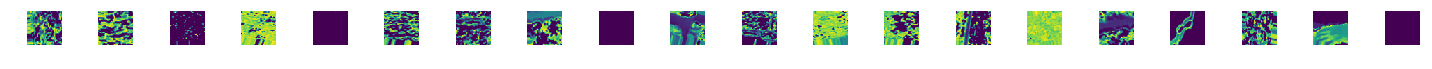

In [0]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

datagen = ImageDataGenerator(width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            zoom_range = 0.3,
                            shear_range = 0.1,
                            rotation_range = 15.)

datagen.fit(X_train)

batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 20, figsize = (20, 5))
fig.tight_layout()

for i in range(20):
  axs[i].imshow(X_batch[i].reshape(50, 50))
  axs[i].axis('off')
  
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_val = to_categorical(y_val, 2)

In [0]:
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (9, 9), input_shape=(50, 50, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(40, (7, 7), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(90, (5, 5), activation='relu'))
  model.add(Flatten())
  model.add(Dense(600, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


Using TensorFlow backend.


In [0]:

model = modified_model()
print(model.summary())
  
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                              steps_per_epoch=1500,
                              epochs=15,
                              validation_data=(X_val, y_val), shuffle = 1)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 42, 42, 60)        4920      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 40)        117640    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 40)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 90)          90090     
_________________________________________________________________
flatten_1 (Flatten)          (None, 810)               0        

NameError: ignored

Test score:  0.272800558736158
Test accuracy:  0.9488372093023256


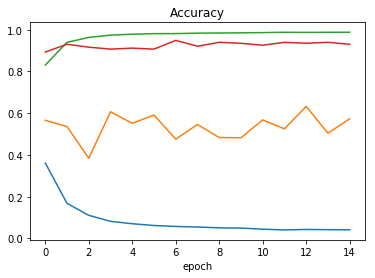

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

score = model.evaluate(X_test, y_test, verbose = 0)

print('Test score: ',score[0])
print('Test accuracy: ',score[1])



In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Video
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

ImportError: ignored

In [0]:
Qfrom PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('photo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = plt.get_cmap('gray'))

img = np.asarray(img)
img = cv2.resize(img, (50, 50))
img = pre_process(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))

print(img.shape)



In [0]:
img = img.reshape(1, 50, 50, 1)

print('Predicted State: '+ str(model.predict_classes(img)))